#### **Import all libraries needed for this project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
print('libraries imported successfully')

libraries imported successfully


In [2]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)
df.head()

C:\Users\izzie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [65]:
df.shape

(194673, 38)

In [3]:
#Analysis of feature patterns
#install seaborn
! pip install seaborn

In [4]:
#list data types
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### **NORMALIZATION**

Text(0.5, 1.0, 'Accident Severity (imbalanced)')

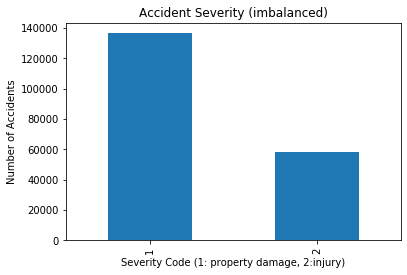

In [5]:
df.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: property damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (imbalanced)')

In [6]:
#Descriptive Stats
descriptive_stats= df.describe(include="all")

In [7]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

##### As shown above, the **SEVERITYCODE** column is very imbalanced with code 1 having 136485 which is more than double code 2 values. So we have to balance this column. 

In [8]:
# Separate majority and minority classes
from sklearn.utils import resample
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=136485,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print('severity column', df_upsampled.SEVERITYCODE.value_counts())
print ('Severity code column is now balanced')

severity column 2    136485
1    136485
Name: SEVERITYCODE, dtype: int64
Severity code column is now balanced


#### Let's visualized the balanced column

Looks better!


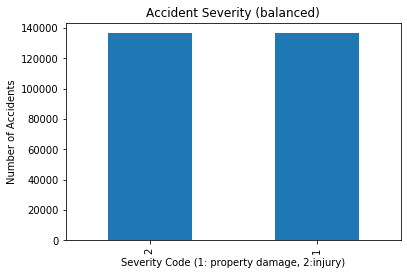

In [9]:
df_upsampled.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: property damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (balanced)')
print ('Looks better!')

#### Colums **X and Y** are the longitudes and latitudes respectively, so lets rename them to reflect this

In [10]:

df_1 = df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
df_1.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### **FEATURE SELECTION**
#### **Drop the columns not needed**  
Drop Location since we have Langitude and Latitude , 
SEVERITYCODE appears twice, let's drop the duplicate column (SEVERITYCODE.1)
##### We are predicting the severity of car accidents, so the columns we are interested in are SEVERITYCODE, WEATHER, ROADCOND and LIGHTCOND.
##### **Drop columns** - OBJECTID, INCKEY, COLDETKEY, REPORTNO,INTKEY,EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY 
##### **Drop unnnecessary data** -  STATUS, EXCEPTRSNDESC, INCDATE , INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT,ST_COLDESC, UNDERINFL, PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE 

In [11]:
dfnew = df_1.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
dfnew.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [12]:
#dfnew info
print('size:', (dfnew.size))
print ('shape:', (dfnew.shape))
print ('data types:', (dfnew.dtypes))
print ('data info:', (dfnew.info()))

size: 2141403
shape: (194673, 11)
data types: SEVERITYCODE        int64
LONGITUDE         float64
LATITUDE          float64
PERSONCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE       object
INATTENTIONIND     object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   LONGITUDE       189339 non-null  float64
 2   LATITUDE        189339 non-null  float64
 3   PERSONCOUNT     194673 non-null  int64  
 4   VEHCOUNT        194673 non-null  int64  
 5   JUNCTIONTYPE    188344 non-null  object 
 6   INATTENTIONIND  29805 non-null   object 
 7   WEATHER         189592 non-null  object 
 8   ROADCOND        189661 non-null  object 
 9   LIGHTCOND       189503 non-null 

In [13]:
#get null values
dfnew.isna().sum()

SEVERITYCODE           0
LONGITUDE           5334
LATITUDE            5334
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

##### Remember we are interested in are **SEVERITYCODE, WEATHER, ROADCOND and LIGHTCOND.**

In [14]:
#value count
dfnew['SEVERITYCODE'].value_counts().idxmax()

1

In [15]:
dfnew['WEATHER'].value_counts().idxmax()

'Clear'

In [16]:
dfnew['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [17]:
dfnew['LIGHTCOND'].value_counts().idxmax()

'Daylight'

#### Encoding labels and replacing NaN values/ normalization 

In [18]:
# Replacing NaN value by Unknown
dfnew['WEATHER'].replace(np.NaN, "Unknown", inplace=True)

In [19]:
# encoding clear, other and unknown with 1
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
dfnew.replace(encoding_WEATHER, inplace=True)
dfnew['WEATHER'].value_counts()

1    132139
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [20]:
dfnew['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [21]:
dfnew['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [22]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
dfnew.replace(encoding_SPEEDING, inplace=True)
dfnew['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [23]:
dfnew['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [24]:
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
dfnew.replace(encoding_ROADCOND, inplace=True)
dfnew['ROADCOND'].value_counts()

1    144732
2     47474
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [25]:
dfnew['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [26]:
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
dfnew.replace(encoding_LIGHTCOND, inplace=True)
dfnew['LIGHTCOND'].value_counts()

0    135015
1     59658
Name: LIGHTCOND, dtype: int64

In [27]:
dfnew['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [28]:
dfnew['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [29]:
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
dfnew.replace(encoding_JUNCTIONTYPE, inplace=True)
dfnew['JUNCTIONTYPE'].value_counts()

1    96138
2    62810
3    22790
4    10671
5     2098
6      166
Name: JUNCTIONTYPE, dtype: int64

In [30]:
dfnew['LONGITUDE'].value_counts()

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: LONGITUDE, Length: 23563, dtype: int64

In [31]:
# NaN values are placed by the mean values of the column
avg_LONGITUDE = dfnew["LONGITUDE"].astype("float").mean(axis=0)
print("LONGITUDE mean:", avg_LONGITUDE)
dfnew['LONGITUDE'].replace(np.NaN, avg_LONGITUDE, inplace=True)

LONGITUDE mean: -122.33051843904114


In [32]:
dfnew['LATITUDE'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: LATITUDE, Length: 23839, dtype: int64

In [33]:
avg_LATITUDE = dfnew["LATITUDE"].astype("float").mean(axis=0)
print("LATITUDE mean:", avg_LATITUDE)
dfnew['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

LATITUDE mean: 47.619542517688615


In [34]:

dfnew['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [35]:
dfnew['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)

In [36]:
encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
dfnew.replace(encoding_INATTENTIONIND, inplace=True)
dfnew['INATTENTIONIND'].value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [37]:
#check for missing values
dfnew.isna().sum()

SEVERITYCODE      0
LONGITUDE         0
LATITUDE          0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [38]:
dfnew.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,1,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,1,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0


### MODEL TRAINING AND DEVELOPMENT
We will use the machine learning algorithms listed below:

K-Nearest Neighbors (KNN)  
Decision Tree  
Logistic Regression  
Support Vector Machine  


In [39]:
feature = dfnew[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]
feature.head()

,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,-122.306426,47.545739,2,2,2,0,2,2,0,0


In [40]:
X = feature
y = dfnew['SEVERITYCODE'].values

In [41]:

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.24930404,  1.50948129, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  1.91514317,  1.3926872 , -0.66472702, -0.22440165],
       [-0.56747188,  0.49889979, -0.33020207,  0.12553783, -0.81596734,
        -0.42518348,  0.64986567,  1.3926872 ,  1.50437693, -0.22440165],
       [-0.1360361 , -0.21073866,  1.15576451,  1.7102107 , -0.81596734,
        -0.42518348,  1.91514317, -0.53629605, -0.66472702, -0.22440165],
       [-0.14494267, -0.26614566,  0.41278122,  1.7102107 , -0.81596734,
        -0.42518348, -0.61541182, -0.53629605, -0.66472702, -0.22440165],
       [ 0.81495737, -1.33262277, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  0.64986567,  1.3926872 , -0.66472702, -0.22440165]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 10) (155738,)
Test set: (38935, 10) (38935,)


### K Nearest Neighbor(KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [44]:
yhat = neighbor.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [45]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbor.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.796279649154349
Test set Accuracy:  0.7255939386156415


In [46]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66605882, 0.71539746, 0.6977013 , 0.72559394, 0.71442147,
       0.73132143, 0.72153589, 0.73293951, 0.72677539])

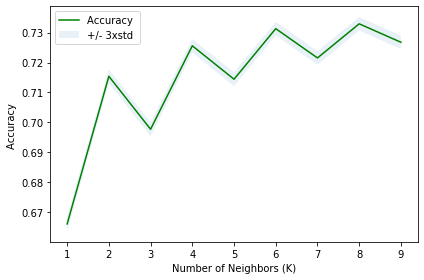

In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7329395145755747 with k= 8


In [49]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7062731513289651

In [67]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\izzie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7030949017593425

### Decision Tree

In [51]:
sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
sevTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
#Prediction
yhat = sevTree.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.7429562090663927


In [54]:
print('f1 score:', f1_score(y_test, yhat, average='weighted'))

f1 score: 0.7002101557946572


In [55]:
print ('jaccard similarity:', jaccard_similarity_score(y_test, yhat))

jaccard similarity: 0.7429562090663927


C:\Users\izzie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Logistic Regression

In [56]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Regresion's Accuracy:  0.7030949017593425


In [59]:
print('f1 score:', f1_score(y_test, yhat, average='weighted'))
print ('jaccard similarity:', jaccard_similarity_score(y_test, yhat))

f1 score: 0.6130193709022662
jaccard similarity: 0.7030949017593425


C:\Users\izzie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [60]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat)

24.328955222549084

## Results and Evaluation

In [63]:
df2 = pd.DataFrame({
                    'Algorithm': ['KNN','DecisionTree', 'LogisticRegression'],
                    'Jaccard': ['0.7267753948889174', '0.7429562090663927', '0.7030949017593425' ],
                    'F1-Score': ['0.7062731513289651', '0.7002101557946572', '0.6130193709022662'  ],
                    'Accuracy': [' 0.7255939386156415' , '0.7429562090663927' , '0.7030949017593425'],
                    'Logloss': ['NA', 'NA', '24.328955222549084']
                   })
df2

,Algorithm,Jaccard,F1-Score,Accuracy,Logloss
0,KNN,0.7267753948889174,0.7062731513289651,0.7255939386156415,NA
1,DecisionTree,0.7429562090663927,0.7002101557946572,0.7429562090663927,NA
2,LogisticRegression,0.7030949017593425,0.6130193709022662,0.7030949017593425,24.328955222549084


**From the results above, decision tree has proven to the best algorithm for predicting severity of car accidents with an accuracy score of 74%**

## Discussion

After extracting the dataset into a pandas data frame. Majority of the data in the dataset were of type ‘object’ which could not have been used for data analysis. Data encoding was used to create labels of datatype ‘int’. Majority of the data in the dataset were imbalanced and had to be normalized. Methods used to normalize the data were, replacing with average value of entire value, drop unwanted rows/columns, replace missing values with most frequent value in the column and down sampling the majority class with sklearn's resample tool.

## Conclusion 

From the data set provided to us, we can see that change in weather is being directly linked to some classes. From this statement, we arrived at the conclusion that a change in weather can, to an extent can affect one’s mode of travel and like-hood of code 1 or code 2 damages occurring (property loss and injuries respectively).  